In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy 
from neurosim.models.ssr import StateSpaceRealization as SSR
import matplotlib.pyplot as plt

In [3]:
import sys
from tqdm import tqdm
import torch

In [4]:
sys.path.append('../..')
from utils import calc_loadings

### Goal: Prove that autonomous PI bounds the IB solution

In [5]:
# Can argue this is true via data processing inequality

### Goal: Demonstrate that the introduction of skip connections in the Schur basis gives rise to PCA/DCA differences

In [6]:
import networkx as nx
from networkx.generators.classic import balanced_tree, full_rary_tree

In [7]:
from dca.dca import DynamicalComponentsAnalysis as DCA
from dca_research.kca import KalmanComponentsAnalysis as KCA

In [8]:
from neurosim.graph.cavity import (build_cavity_system, CavitySystem, get_Btilde,
                                   Node, randomize_tree, SpectralDensity, block_index)
from neurosim.graph.random import oriented_regular_random_graph
from neurosim.utils.schur_decomposition import schur
from neurosim.models.ssr import StateSpaceRealization as SSR

#### Trees with no weight dispersion

In [43]:
n = 500
br = 2
m = 0.5
sigma = 0.0001
A = randomize_tree(full_rary_tree(br, n, create_using=nx.DiGraph), 0, 0.8, lambda : np.random.normal(m, sigma))
#lambda : np.random.normal(m, sigma)
#the full_rary_tree has porblems....only has around 200 edges, BUT, also that might just be how a Feedforward tree is, t
#the nodes with no edges are the LEAFs!!
#print(A)

In [44]:
ssr = SSR(A=A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))

In [45]:
eig, U = np.linalg.eig(ssr.cov)
eigorder = np.argsort(np.abs(eig))[::-1]
U = U[:, eigorder]

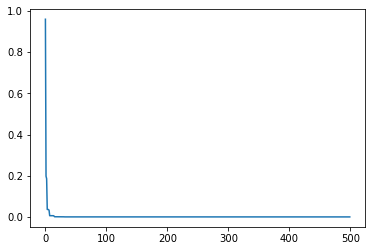

In [46]:
plt.plot(np.abs(U[:, 0]))

In [47]:
dcamodel = DCA(T=3, d=1)
dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
dcamodel.fit_projection()

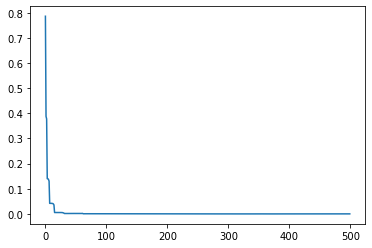

In [48]:
plt.plot(np.abs(np.squeeze(dcamodel.coef_)))

In [ ]:
# Linear chain

In [97]:
n = 500
br = 10
m = 0.5
sigma = 0.0001
A = randomize_tree(full_rary_tree(br, n, create_using=nx.DiGraph), 0, 0.8, lambda : np.random.normal(m, sigma))
#lambda : np.random.normal(m, sigma)
#the full_rary_tree has porblems....only has around 200 edges, BUT, also that might just be how a Feedforward tree is, t
#the nodes with no edges are the LEAFs!!
#print(A)

In [98]:
ssr = SSR(A=A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))

In [99]:
eig, U = np.linalg.eig(ssr.cov)
eigorder = np.argsort(np.abs(eig))[::-1]
U = U[:, eigorder]

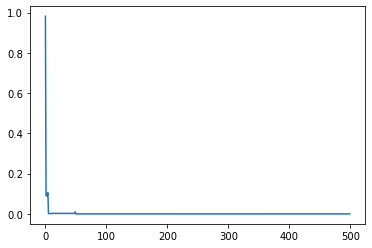

In [100]:
plt.plot(np.abs(U[:, 0]))

In [101]:
dcamodel = DCA(T=3, d=1)
dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
dcamodel.fit_projection()

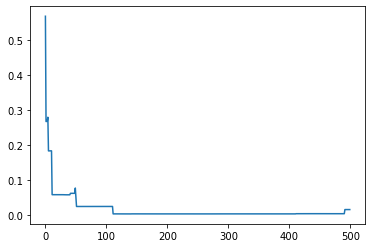

In [102]:
plt.plot(np.abs(np.squeeze(dcamodel.coef_)))

In [103]:
# Adding skip connections

In [112]:
n = 500
br = 3
m = 0.5
sigma = 0.0001
A = randomize_tree(full_rary_tree(br, n, create_using=nx.DiGraph), 0, 0.8, lambda : np.random.normal(m, sigma))

In [114]:
A[0:10, 0:10]

array([[0.8       , 0.49997839, 0.499806  , 0.50010995, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.8       , 0.        , 0.        , 0.50004082,
        0.50004309, 0.50002799, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.8       , 0.        , 0.        ,
        0.        , 0.        , 0.49983939, 0.49982289, 0.50012392],
       [0.        , 0.        , 0.        , 0.8       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.8       ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [105]:
Z, T = scipy.linalg.schur(A)

#### Concrete question: What is the effect on the Schur basis of introducing a feedback loop in the connectivity?  

In [145]:
n = 7
br = 2
m = 0.5
sigma = 0.0001
A = randomize_tree(full_rary_tree(br, n, create_using=nx.DiGraph), 0, 0.8, lambda : np.random.normal(m, sigma))

In [146]:
A[2, -2] = 0.5
A[2, -1] = 0.5

In [147]:
A

array([[0.8       , 0.5000954 , 0.49997649, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.8       , 0.        , 0.49998094, 0.49996643,
        0.        , 0.        ],
       [0.        , 0.        , 0.8       , 0.        , 0.        ,
        0.5       , 0.5       ],
       [0.        , 0.        , 0.        , 0.8       , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.8       ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8       , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8       ]])

#### Opposite extreme: the off-diagonal components are random normal

In [52]:
A = np.diag(0.8 * np.ones(500))
for i in range(1, A.shape[0]):
    for j in range(i):
        A[i, j] = np.random.normal(scale=0.25)

In [54]:
ssr = SSR(A=A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))
eig, U = np.linalg.eig(ssr.cov)
eigorder = np.argsort(np.abs(eig))[::-1]
U = U[:, eigorder]

In [ ]:
dcamodel = DCA(T=3, d=1)
dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
dcamodel.fit_projection()

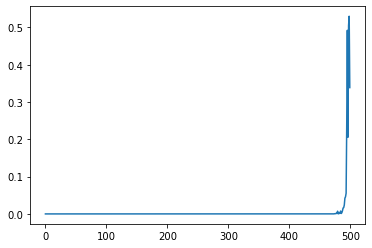

In [55]:
plt.plot(np.abs(U[:, 0]))

In [56]:
dcamodel = DCA(T=3, d=1)
dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
dcamodel.fit_projection()

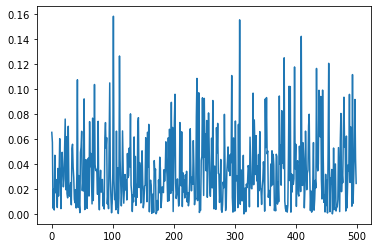

In [57]:
plt.plot(np.abs(np.squeeze(dcamodel.coef_)))

#### What is minimum phase on a tree?

In [182]:
n = 50
br = 2
m = 0.5
sigma = 0.0001
A = randomize_tree(full_rary_tree(br, n, create_using=nx.DiGraph), 0, 0.8, lambda : np.random.normal(m, sigma))
A = 0.5 * (A + A.T)
C = np.zeros((1, A.shape[0]))
C[0, 1] = 1
ssr = SSR(A=A, B=np.eye(A.shape[0]), C=C)

In [183]:
eig, U = np.linalg.eig(ssr.P)
eigorder = np.argsort(np.abs(eig))[::-1]
U = U[:, eigorder]

In [184]:
ssr.solve_min_phase()
ssr.solve_max_phase()

In [185]:
ssr.Bmin

array([[ 56.05889131],
       [  3.90586678],
       [143.22207119],
       [-19.36733464],
       [-19.28449374],
       [213.4958477 ],
       [ 97.89104779],
       [-22.66745605],
       [-22.64614636],
       [-22.5872461 ],
       [-22.54883972],
       [277.22460102],
       [120.70063158],
       [ 54.41494703],
       [ 54.43062011],
       [-15.98555447],
       [-15.98724712],
       [-15.96375129],
       [-15.96157643],
       [-15.93822037],
       [-15.92462286],
       [-15.89658606],
       [-15.89964632],
       [163.37306427],
       [317.16482944],
       [ 47.13086863],
       [ 47.15696624],
       [ 21.14770242],
       [ 21.15028577],
       [ 21.15411054],
       [ 21.15498823],
       [ -6.97018776],
       [ -6.97125165],
       [ -6.97178599],
       [ -6.97112729],
       [ -6.95884749],
       [ -6.957577  ],
       [ -6.9572433 ],
       [ -6.9556879 ],
       [ -6.94918385],
       [ -6.9510831 ],
       [ -6.94210765],
       [ -6.94198451],
       [ -6

In [186]:
ssr.Bmax

array([[-3.62805981],
       [-6.3258937 ],
       [-4.94959014],
       [-7.80369432],
       [-7.79935264],
       [-4.97579556],
       [-4.6288888 ],
       [-7.26002595],
       [-7.26569854],
       [-7.26131067],
       [-7.25919449],
       [-4.18992415],
       [-3.20833705],
       [-3.10369231],
       [-3.1045822 ],
       [-5.08250722],
       [-5.08304508],
       [-5.08810307],
       [-5.08719592],
       [-5.08700012],
       [-5.08208363],
       [-5.08378124],
       [-5.08440614],
       [-2.31743905],
       [-3.4006085 ],
       [-1.35596495],
       [-1.35671579],
       [-1.33121397],
       [-1.33137659],
       [-1.33162104],
       [-1.33167629],
       [-2.2452696 ],
       [-2.2456123 ],
       [-2.24578422],
       [-2.24557204],
       [-2.24795587],
       [-2.24754546],
       [-2.24729664],
       [-2.24679422],
       [-2.24727801],
       [-2.2478922 ],
       [-2.24460931],
       [-2.24456949],
       [-2.24670194],
       [-2.24589899],
       [-2

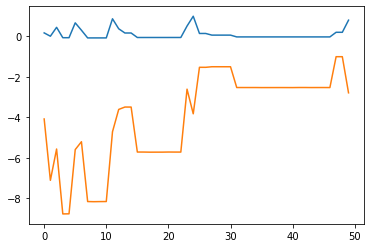

In [187]:
plt.plot(ssr.Bmin/np.max(ssr.Bmin))
plt.plot(np.abs(ssr.Bmax)/np.max(ssr.Bmax))
#plt.plot(np.abs(U[:, 0])/np.max(np.abs(U[:, 0])))

In [ ]:
# 2 concrete questions:

# (1a) Increase non-normality, see correlation between DCA and PCA loadings decrease
# (1b) Does increasing the number of paths a process can take 

# (2) Higher order dimlets and correlation with loadings

# (3) Express cepstrum in terms of the Linear Prediction Coefficients. Do the LPCs simplify for a tree?

In [10]:
from tqdm import tqdm
import pdb

In [207]:
nn_scale = np.linspace(0, 0.25, 50)
reps = 20
spearmanr = np.zeros((nn_scale.size, reps))
for ii, scale in tqdm(enumerate(nn_scale)):
    for jj in range(reps):
        A = np.diag(np.linspace(0.01, 0.8, 500))
        for i in range(1, A.shape[0]):
            for j in range(i):
                A[i, j] = np.random.normal(scale=scale)
                
        ssr = SSR(A=A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))
        eig, U = np.linalg.eig(ssr.cov)
        eigorder = np.argsort(np.abs(eig))[::-1]
        U = U[:, eigorder]

        pca_loadings = calc_loadings(U[:, 0:2])
        
        dcamodel = DCA(T=3, d=2)
        dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
        dcamodel.fit_projection(n_init=10) 
        
        dca_loadings = calc_loadings(dcamodel.coef_)
        
        spearmanr[ii, jj] = scipy.stats.spearmanr(pca_loadings, dca_loadings)[0]
    
    

50it [50:13, 60.26s/it]


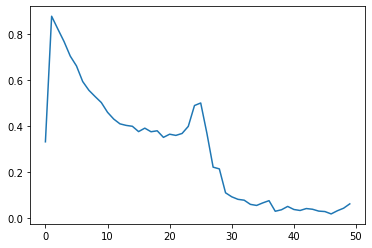

In [209]:
plt.plot(np.mean(spearmanr, axis=1))

In [213]:
scipy.stats.bernoulli.rvs(0.5)

1

In [216]:
# What is an alternative structure that gives cleaner results?
off_diag_sparsity = np.linspace(0, 1, 50)

reps = 1
spearmanr = np.zeros((nn_scale.size, reps))
for ii, ods in tqdm(enumerate(off_diag_sparsity)):
    for jj in range(reps):
        A = np.diag(np.linspace(0.01, 0.8, 500))
        for i in range(1, A.shape[0]):
            for j in range(i):
                A[i, j] = np.random.normal(scale=0.25) * scipy.stats.bernoulli.rvs(ods)
                
        ssr = SSR(A=A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))
        eig, U = np.linalg.eig(ssr.cov)
        eigorder = np.argsort(np.abs(eig))[::-1]
        U = U[:, eigorder]

        pca_loadings = calc_loadings(U[:, 0:2])
        
        dcamodel = DCA(T=3, d=2)
        dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
        dcamodel.fit_projection(n_init=10) 
        
        dca_loadings = calc_loadings(dcamodel.coef_)
        
        spearmanr[ii, jj] = scipy.stats.spearmanr(pca_loadings, dca_loadings)[0]
        
        

50it [04:32,  5.46s/it]


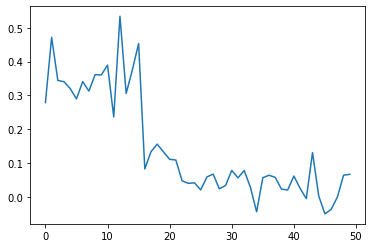

In [218]:
plt.plot(spearmanr[:, 0])

In [219]:
# Use a ring network that initially begins as symmetric, and then make the connections directed

In [237]:
directedness = np.linspace(0, 1, 10)
ods = 0.2
reps = 1
spearmanr = np.zeros((directedness.size, reps))
for ii, d_ in tqdm(enumerate(directedness)):
    for jj in range(reps):
        
        A = np.diag(np.random.uniform(0.5, 0.75, size=(100,)))
        for i in range(A.shape[0] - 1):
            p = scipy.stats.bernoulli.rvs(0.5)
            if p:
                A[i, i + 1] = ods
                A[i + 1, i] = d_ * ods
            else:
                A[i, i + 1] = d_ * ods
                A[i + 1, i] = ods
                
        # Complete the loop
        p = scipy.stats.bernoulli.rvs(0.5)
        if p:
            A[0, -1] = ods
            A[-1, 0] = d_ * ods
        else:
            A[0, -1] = d_ * ods
            A[-1, 0] = ods
            
        while max(np.abs(np.linalg.eigvals(A))) > 0.99:
            print('Unstable, trying again')
            A = np.diag(np.random.uniform(0.5, 0.9, size=(10,)))
            for i in range(A.shape[0] - 1):
                
                A[i, i + 1] = ods
                A[i + 1, i] = d_ * ods

                
        ssr = SSR(A=A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))
        eig, U = np.linalg.eig(ssr.cov)
        eigorder = np.argsort(np.abs(eig))[::-1]
        U = U[:, eigorder]

        pca_loadings = calc_loadings(U[:, 0:2])
        
        dcamodel = DCA(T=3, d=2)
        dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
        dcamodel.fit_projection(n_init=10) 
        
        dca_loadings = calc_loadings(dcamodel.coef_)
        spearmanr[ii, jj] = scipy.stats.spearmanr(pca_loadings, dca_loadings)[0]
        

7it [00:06,  1.42it/s]

Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, t


8it [00:06,  1.71it/s]

Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, t


9it [00:07,  1.82it/s]

Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, t

10it [00:07,  1.28it/s]


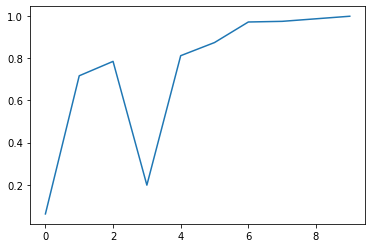

In [238]:
plt.plot(np.mean(spearmanr, axis=1))

In [ ]:
# Feedforward ring doesn't work, but if we randomly reverse the direction of connection, then it does

In [ ]:
# Stick to random networks, progressively make it directred

In [10]:
directedness = np.linspace(0, 1, 10)[::-1]
reps = 100
spearmanr = np.zeros((directedness.size, reps, 3))
phi = np.zeros((directedness.size, reps, 3))
size = 10
d = -1.2
for ii, d_ in tqdm(enumerate(directedness)):
    for jj in range(reps):
        
        A = np.zeros((size, size))
        for i in range(A.shape[0]):
            for j in range(i + 1):
                a = 1/(2 * np.sqrt(size)) * np.random.normal(0, 1)
                if i != j:
                    p = scipy.stats.bernoulli.rvs(0.5)
                    if p:
                        A[i, j] = a
                        A[j, i] = d_ * A[i, j]
                    else:
                        A[j, i] = a
                        A[i, j] = d_ * A[j, i]
                        
                else:
                    A[i, i] = a
                
            
#        while max(np.real(np.linalg.eigvals(A))) > 0:
        while max(np.abs(np.linalg.eigvals(A))) > 0.99:
            print('Unstable, trying again')
            A = np.zeros((size, size))
            for i in range(A.shape[0]):
                for j in range(i + 1):
                    a = 1/(2 * np.sqrt(size)) * np.random.normal(0, 1)
                    if i != j:
                        p = scipy.stats.bernoulli.rvs(0.5)
                        if p:
                            A[i, j] = a
                            A[j, i] = d_ * A[i, j]
                        else:
                            A[j, i] = a
                            A[i, j] = d_ * A[j, i]

                    else:
                        A[i, i] = a

        # Cayley trasnform
#        A = (np.eye(A.shape[0]) + A) @ np.linalg.inv(np.eye(A.shape[0]) - A)
                
        ssr = SSR(A=A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))
        eig, U = np.linalg.eig(ssr.cov)
        eigorder = np.argsort(np.abs(eig))[::-1]
        U = U[:, eigorder]
        pca_loadings = calc_loadings(U[:, 0:1])
        
        dcamodel = KCA(T=1, d=1, causal_weights=(1, 0), project_mmse=False)
        dcamodel.cross_covs = torch.tensor(ssr.autocorrelation(10))
        dcamodel.fit_projection(n_init=10)         
            
        # Controllabilityategy: While pioneering in the Middle Ages you will found and expand a village, manage the inhabitants, collect resources and produce all the goods you need and use or capitalise by trading them.

Features:

    Beautiful and realistic open world 3D landscape with state-of-the-art graphics
    Full 4 seasons with day/night cycle and realistic weather conditions
    Interactive environment with trees to fell, various fruit to pluck, stones to collect, caves to explore and many more
    18 different buildings with various levels from hay shacks to full stone mansions
    Over 60 pieces of equipment to craft, including weapons, tools, furniture and clothing
    Realistic wildlife interaction with plenty of different animals such as wolves, wild boars, deer, rabbits and others
    All activities will impact on food, water, health and endurance status
    Detailed skill tree for individual character development
    Unique events and decisions with direct impact on gameplay
    Dynasty reputation system triggering events with the king
    Quests, trade and economy, sandbox option, social connections to NPCs and many more

System Requirements

    Minimum:
        OS: Windows 7, 8, 10
        Processor: 3 GHz Quad Core Processor
        Memory: 8 GB RAM
        Graphics: DirectX 11 compatible GPU, 4GB dedicated VRAM (GeForce GTX 970 / Radeon RX 480)
        DirectX: Version 11
        Network: Broadband Internet connection
        Storage: 10 GB available space

    Recommended:
        OS: Windows 10
        Processor: 4 GHz Quad Core Processor
        Memory: 16 GB RAM
        Graphics: DirectX 11 compatible GPU, 6GB dedicated VRAM (GeForce GTX 1060 / Radeon RX 580)
        DirectX: Version 11
        Network: Broadband Internet connection
        Storage: 10 GB available space

Medieval Dynasty ©2021 Render Cube S.A. Published by Toplitz Productions GmbH. Developed by Render Cube. All rights reserved.
See all
More like this
Satisfactory
-30%
$29.99
$20.99
Rust
-33%
$39.99
$26.79
Project Zomboid
-33%
$14.99
$10.04
The Forest
-60%
$19.99
$7.99
ICARUS
-10%
$29.99
$26.99
Valheim
-25%
$19.99
$14.99
ARK: Survival Evolved
-67%
$29.99
$9.89
Oxygen Not Included
-60%
$24.99
$9.99
Space Engineers
-30%
$19.99
$13.99
Going Medieval
-10%
$24.99
$22.49
Terraria
-50%
$9.99
$4.99
theHunter: Call of the Wild™
-76%
$19.99
$4.79

        ssr2 = SSR(A = A.T, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))
        dcamodel2 = KCA(T=1, d=1, causal_weights=(1, 0), project_mmse=False)
        dcamodel2.cross_covs = torch.tensor(ssr2.autocorrelation(10))
        dcamodel2.fit_projection(n_init=10)         

        
        dca_loadings = calc_loadings(dcamodel.coef_)
        dca_loadings2 = calc_loadings(dcamodel2.coef_)
        spearmanr[ii, jj, 0] = scipy.stats.spearmanr(pca_loadings, dca_loadings)[0]
        spearmanr[ii, jj, 1] = scipy.stats.spearmanr(pca_loadings, dca_loadings2)[0]
        spearmanr[ii, jj, 2] = scipy.stats.spearmanr(dca_loadings, dca_loadings2)[0]
        phi[ii, jj, 0] = scipy.linalg.subspace_angles(U[:, 0][:, np.newaxis], dcamodel.coef_)        
        phi[ii, jj, 1] = scipy.linalg.subspace_angles(U[:, 0][:, np.newaxis], dcamodel2.coef_)
        phi[ii, jj, 2] = scipy.linalg.subspace_angles(dcamodel.coef_, dcamodel2.coef_)


0it [00:00, ?it/s]

Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again



1it [00:21, 21.56s/it]

Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again
Unstable, trying again



2it [00:44, 22.13s/it]

Unstable, trying again


10it [04:39, 27.95s/it]


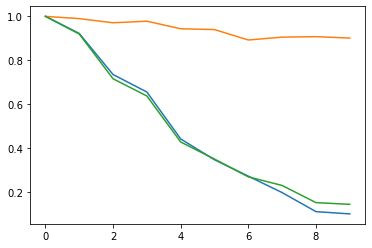

In [15]:
plt.plot(np.mean(spearmanr[..., 0], axis=1))
plt.plot(np.mean(spearmanr[..., 1], axis=1))
plt.plot(np.mean(spearmanr[..., 2], axis=1))
#plt.plot(np.mean(phi, axis=1))

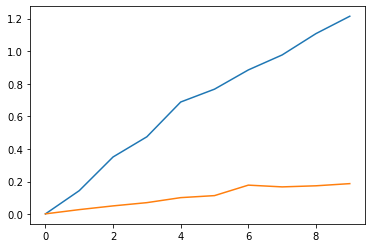

In [18]:
plt.plot(np.mean(phi[..., 0], axis=1))
plt.plot(np.mean(phi[..., 1], axis=1))

In [13]:
import pickle

In [14]:
with open('nn_example.dat', 'wb') as f:
    f.write(pickle.dumps(spearmanr))
    f.write(pickle.dumps(phi))

In [ ]:
# Isn't it the case that loadings can be freely manipulated?

In [274]:
# What in the fuck is going on....

In [153]:
A = np.zeros((size, size))
for i in range(A.shape[0]):
    for j in range(i + 1):
        a = 1/(2 * np.sqrt(size)) * np.random.normal(0, 1)
        if i != j:
            p = scipy.stats.bernoulli.rvs(0.5)
            if p:
                A[i, j] = a
                A[j, i] = d_ * A[i, j]
            else:
                A[j, i] = a
                A[i, j] = d_ * A[j, i]

        else:
            A[i, i] = a


while max(np.abs(np.linalg.eigvals(A))) > 0.99:
    print('Unstable, trying again')
    A = np.zeros((size, size))
    for i in range(A.shape[0]):
        for j in range(i + 1):
            a = 1/(2 * np.sqrt(size)) * np.random.normal(0, 1)
            if i != j:
                p = scipy.stats.bernoulli.rvs(0.5)
                if p:
                    A[i, j] = a
                    A[j, i] = d_ * A[i, j]
                else:
                    A[j, i] = a
                    A[i, j] = d_ * A[j, i]

            else:
                A[i, i] = a

#A = np.diag(np.linalg.eigvals(A))
A = np.diag(np.random.uniform(-0.8, 0.9, size=(size,)))
eig, U = np.linalg.eig(A)
eigorder = np.argsort(np.abs(eig))[::-1]
U = U[:, eigorder]
ssr = SSR(A = A, B=np.eye(A.shape[0]), C=np.eye(A.shape[0]))

Unstable, trying again


In [154]:
np.max(eig)

0.896586607484936

In [155]:
np.min(eig)

-0.7998091141441617

In [156]:
x = ssr.trajectory(int(1e5), burnoff=True)

In [157]:
dcamodel = DCA(T=5, d=1)
dcamodel.fit(x)

In [158]:
scipy.linalg.subspace_angles(U[:, 0][:, np.newaxis], dcamodel.coef_)

array([0.53174084])

In [159]:
ssr1 = SSR(A = A, B=np.eye(A.shape[0]), C=U[:, 0][np.newaxis, :])
ssr2 = SSR(A = A, B=np.eye(A.shape[0]), C=dcamodel.coef_.T)

In [160]:
ssr1.pi(5)

0.8144825278791706

In [161]:
ssr2.pi(5)

0.7941897408949865

In [131]:
# What is very strange is that the T=1 PI is very low....

(array([16., 10., 10.,  9., 11., 10.,  9.,  3., 14.,  8.]),
 array([-0.89817397, -0.80868369, -0.71919341, -0.62970314, -0.54021286,
        -0.45072258, -0.36123231, -0.27174203, -0.18225175, -0.09276148,
        -0.0032712 ]),
 <BarContainer object of 10 artists>)

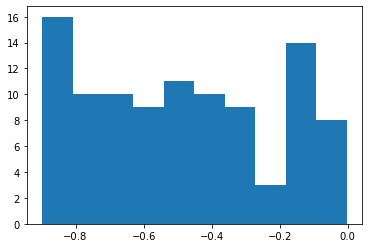

In [123]:
plt.hist(np.linalg.eigvals(A))

In [48]:
# What about single unit?

In [49]:
ssr2.solve_min_phase()
ssr2.solve_max_phase()

In [50]:
ssr2.Bmin.shape

(100, 1)

In [51]:
ssr2.Bmax.shape

(100, 1)

In [52]:
scipy.linalg.subspace_angles(ssr2.Bmin, ssr2.C.T)

array([1.51096504])

In [53]:
scipy.linalg.subspace_angles(ssr2.Bmin, ssr2.Bmax)

array([1.18099814])

In [61]:
ssr.solve_min_phase()

In [62]:
ssr.solve_max_phase()

In [66]:
np.diag(ssr.Pmin)

array([1.45080853e+01, 4.05017986e+01, 9.67000322e+00, 3.85678028e+00,
       3.62751953e+00, 2.62802964e+00, 2.56795771e+00, 2.19437141e+00,
       1.81813767e+00, 1.69002078e+00, 1.68639171e+00, 1.51482636e+00,
       1.26247132e+00, 1.14095134e+00, 1.24139450e+00, 1.15758654e+00,
       1.11871404e+00, 8.83626900e-01, 8.97974830e-01, 8.41167027e-01,
       7.60789440e-01, 7.89900053e-01, 7.01444383e-01, 7.08070057e-01,
       6.38062897e-01, 5.59015533e-01, 5.35796493e-01, 4.78159662e-01,
       5.86596206e-01, 5.58063643e-01, 5.11842171e-01, 4.38533016e-01,
       3.92245563e-01, 3.48341843e-01, 3.37624056e-01, 3.05187397e-01,
       2.88944893e-01, 4.42605951e-01, 3.81503982e-01, 3.83553319e-01,
       3.56008793e-01, 3.37311235e-01, 2.19672295e-01, 2.03475816e-01,
       2.71531934e-01, 2.56647445e-01, 2.39740419e-01, 2.22210410e-01,
       1.85686582e-01, 1.78080125e-01, 1.71196525e-01, 1.50068181e-01,
       1.70778086e-01, 1.60584846e-01, 1.47751054e-01, 1.33428842e-01,
      

In [67]:
np.diag(ssr.P)

array([15.50808526, 41.50179855, 10.67000322,  4.85678028,  4.62751953,
        3.62802964,  3.56795771,  3.19437141,  2.81813767,  2.69002078,
        2.68639171,  2.51482636,  2.26247132,  2.14095134,  2.2413945 ,
        2.15758654,  2.11871404,  1.8836269 ,  1.89797483,  1.84116703,
        1.76078944,  1.78990005,  1.70144438,  1.70807006,  1.6380629 ,
        1.55901553,  1.53579649,  1.47815966,  1.58659621,  1.55806364,
        1.51184217,  1.43853302,  1.39224556,  1.34834184,  1.33762406,
        1.3051874 ,  1.28894489,  1.44260595,  1.38150398,  1.38355332,
        1.35600879,  1.33731124,  1.21967229,  1.20347582,  1.27153193,
        1.25664744,  1.23974042,  1.22221041,  1.18568658,  1.17808013,
        1.17119652,  1.15006818,  1.17077809,  1.16058485,  1.14775105,
        1.13342884,  1.11386351,  1.11007769,  1.13015364,  1.11732311,
        1.10502596,  1.08787662,  1.08144397,  1.06931785,  1.08351625,
        1.05689161,  1.04998018,  1.04826684,  1.03871978,  1.03

In [64]:
ssr.Pmax

array([[ 6.44824931e-02,  3.00953967e-34,  2.24763107e-34, ...,
        -2.81766436e-33,  1.81890302e-33, -5.99550106e-34],
       [-8.30036798e-34,  2.40953413e-02, -7.22384451e-16, ...,
         8.87478972e-19, -1.25714668e-19,  1.49148276e-18],
       [-1.48042940e-34,  7.22759069e-16,  9.37206840e-02, ...,
        -8.83963598e-19, -4.96631874e-19,  2.84103368e-20],
       ...,
       [ 2.76338350e-33, -5.26302811e-19, -2.50808599e-19, ...,
         9.99506917e-01, -3.67673288e-17, -7.44413442e-17],
       [-1.75871519e-33,  5.84577173e-20,  3.45427229e-19, ...,
        -2.48917625e-17,  9.98450934e-01,  2.08555632e-17],
       [ 5.75001482e-34, -7.12889270e-19, -1.44972113e-19, ...,
         2.30580522e-17,  1.70471683e-16,  9.97539765e-01]])

In [133]:
(2-100)/(2 + 100)

-0.9607843137254902

### Phase function of an all pass system

In [5]:
# First check, is resolvent of an orthogonal matrix unitary

In [23]:
state = np.random.RandomState(1234)

In [34]:
A = 0.99 * scipy.stats.ortho_group.rvs(10, random_state=1234)

In [35]:
z = np.exp(1j * np.pi/5)

In [36]:
R = np.linalg.inv(z * np.eye(A.shape[0]) - A)

In [37]:
_, S, _ = np.linalg.svd(R)

In [38]:
S

array([3.2411711 , 1.66682636, 1.62597037, 0.71171353, 0.62476658,
       0.62008211, 0.53598767, 0.52837227, 0.52184082, 0.50251394])